# AN IMPROVED MACHINE LEARNING MODEL FOR FAKE NEWS DETECTION BY TOBI OLADIMEJI

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import re
import string

In [2]:
df_fake = pd.read_csv("/Users/macbook/Downloads/Fake.csv")
df_true = pd.read_csv("/Users/macbook/Downloads/True.csv")

In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
df_true.head(5)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Removing last 10 rows from both the dataset, for manual testing  

In [8]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [9]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis=0, inplace=True)

In [10]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [11]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing] ,axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [12]:
df_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


Merging the main fake and true dataframe

In [13]:
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [15]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [16]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [17]:
df = df.sample(frac = 1)

In [18]:
df.head()

,text,class
18042,CNN s Allison Camerota started out her intervi...,0
6070,WASHINGTON (Reuters) - U.S. Senate Democratic ...,1
8846,Donald Trump has crossed another line that sho...,0
6020,WASHINGTON (Reuters) - U.S. President Donald T...,1
7046,"WEST PALM BEACH, Fla. (Reuters) - U.S. Senator...",1


In [19]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [20]:
df.columns

Index(['text', 'class'], dtype='object')

In [21]:
df.head()

,text,class
0,CNN s Allison Camerota started out her intervi...,0
1,WASHINGTON (Reuters) - U.S. Senate Democratic ...,1
2,Donald Trump has crossed another line that sho...,0
3,WASHINGTON (Reuters) - U.S. President Donald T...,1
4,"WEST PALM BEACH, Fla. (Reuters) - U.S. Senator...",1


#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [22]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [23]:
df["text"] = df["text"].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [24]:
x = df["text"]
y = df["class"]

#### Splitting the dataset into training set and testing set. 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Convert text to vectors

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [30]:
pred_lr=LR.predict(xv_test)

In [31]:
LR.score(xv_test, y_test)

0.9887477718360071

In [32]:
confusion_matrix(y_test, pred_lr)

array([[4678,   62],
       [  39, 4197]])

from the confusion matrix i got 
0.9864 as the accuracy 
0.9895 as sensitivity/recall then 
0.9869 as the f1 score and 
0.9844 as the precision.

In [33]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4740
           1       0.99      0.99      0.99      4236

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



### 2. Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [36]:
pred_dt = DT.predict(xv_test)

In [37]:
confusion_matrix(y_test, pred_dt)

array([[4724,   16],
       [  21, 4215]])

from the confusion matrix i got 
0.9957 as the accuracy 
0.9962 as sensitivity/recall then 
0.9958 as the f1 score and 
0.9955 as the precision.

In [38]:
DT.score(xv_test, y_test)

0.9958778966131907

In [39]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4740
           1       1.00      1.00      1.00      4236

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



### 3. Gradient Boosting Classifier

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [44]:
pred_gbc = GBC.predict(xv_test)

In [45]:
confusion_matrix(y_test, pred_gbc)

array([[4706,   34],
       [   9, 4227]])

from the confusion matrix i got 
0.9949 as the accuracy 
0.9974 as sensitivity/recall then 
0.9951 as the f1 score and 
0.9927 as the precision.

In [46]:
GBC.score(xv_test, y_test)

0.9952094474153298

In [47]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4740
           1       0.99      1.00      0.99      4236

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



### 4. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [50]:
pred_rfc = RFC.predict(xv_test)

In [49]:
confusion_matrix(y_test, pred_rfc)

array([[4619,   64],
       [  48, 4245]])

from the confusion matrix i got 
0.9882 as the accuracy 
0.9885 as sensitivity/recall then 
0.9887 as the f1 score and 
0.9889 as the precision.

In [50]:
RFC.score(xv_test, y_test)

0.9875222816399287

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4740
           1       0.99      0.99      0.99      4236

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



# Model Testing With Manual Entry

### News

In [52]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [53]:
news = str(input())
manual_testing(news)

KeyboardInterrupt: Interrupted by user

## Logistic Regression Confusion Matrix Plot

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


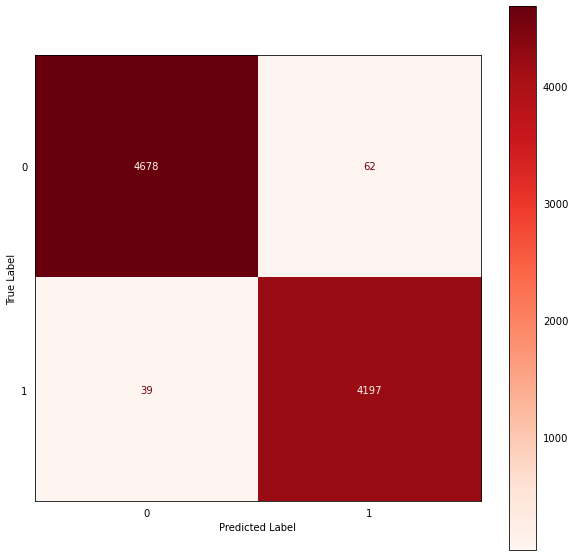

In [53]:
from sklearn.metrics import plot_confusion_matrix

matrix_plot = plot_confusion_matrix(LR, xv_test, y_test, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()


## Gradient Boosting Classifier Confusion Matrix Plot

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


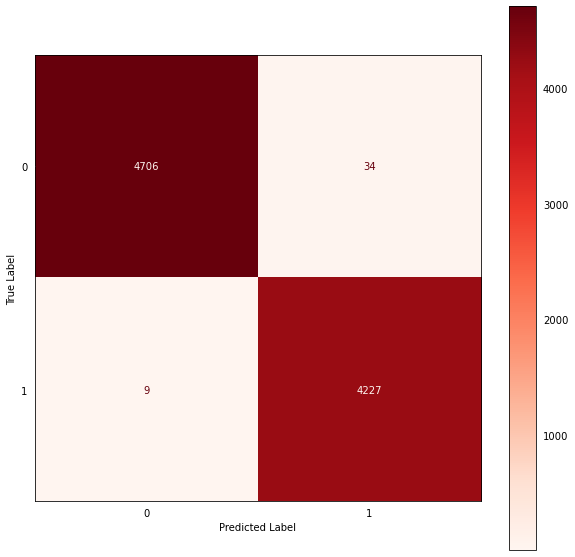

In [54]:
matrix_plot = plot_confusion_matrix(GBC, xv_test, y_test, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()


## Decision Tree Confusion Matrix Plot

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


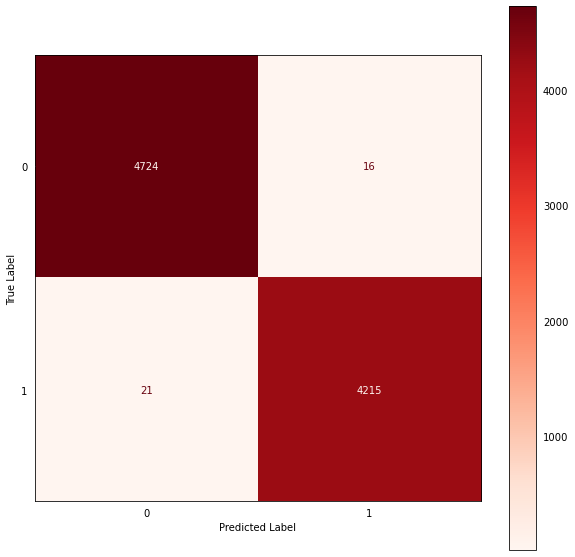

In [55]:
matrix_plot = plot_confusion_matrix(DT, xv_test, y_test, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()


## Random Forest Confusion Matrix Plot

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


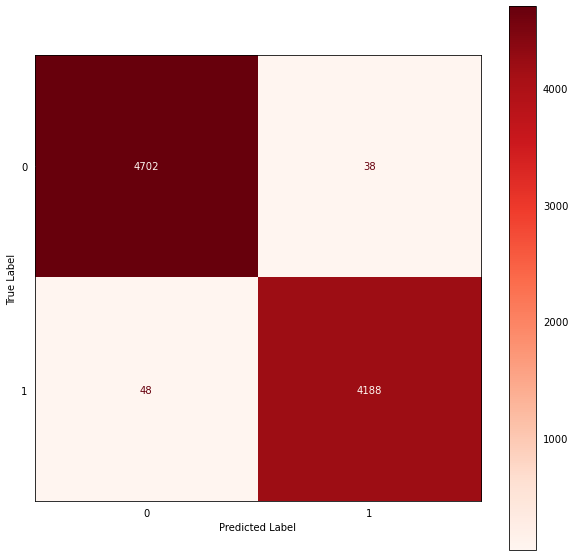

In [56]:
matrix_plot = plot_confusion_matrix(RFC, xv_test, y_test, cmap=plt.cm.Reds)
matrix_plot.ax_.set_title("Confusion Matrix", color='white')
plt.xlabel('Predicted Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[0].tick_params(color="white")
plt.gcf().axes[1].tick_params(color="white")
plt.gcf().set_size_inches(10,10)
plt.show()


## Logistic Regression Roc_Curve

roc_auc_score for LR:  0.9874403349880688


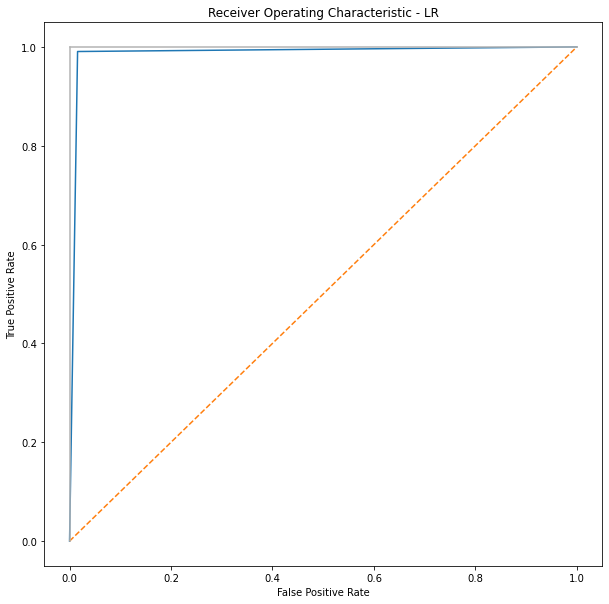

In [58]:
# roc_auc plot for LR
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_lr)
print('roc_auc_score for LR: ', roc_auc_score(y_test, pred_lr))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LR')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Gradient Boosting Classifier Roc_Curve

roc_auc_score for GBC:  0.9935260281736296


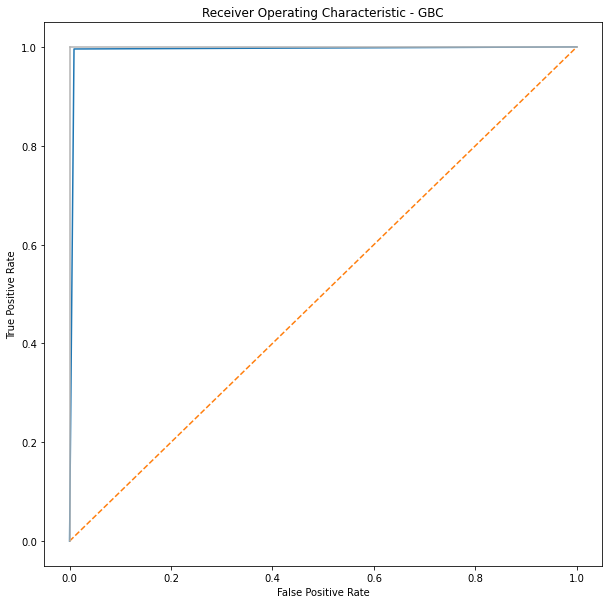

In [59]:
# roc_auc plot for GBC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_gbc)
print('roc_auc_score for GBC: ', roc_auc_score(y_test, pred_gbc))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GBC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Decison Tree Classifier Roc_Curve

roc_auc_score for DT:  0.9945258232902422


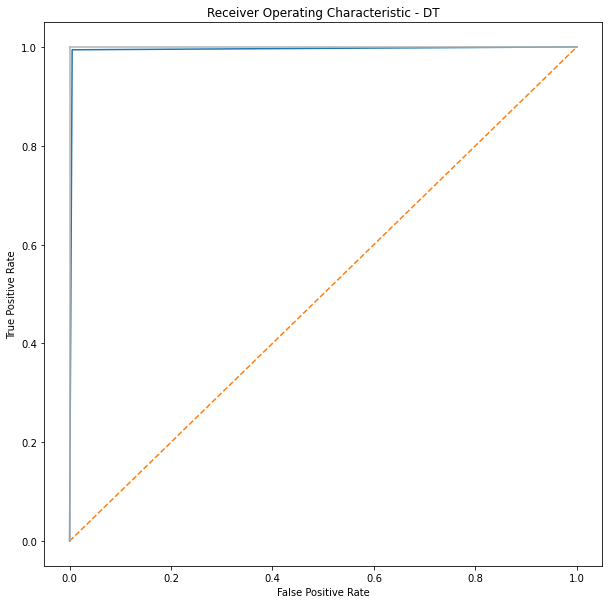

In [60]:
# roc_auc plot for DT
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_dt)
print('roc_auc_score for DT: ', roc_auc_score(y_test, pred_dt))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DT')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Random Forest Roc_Curve

roc_auc_score for RFC:  0.9875762772792979


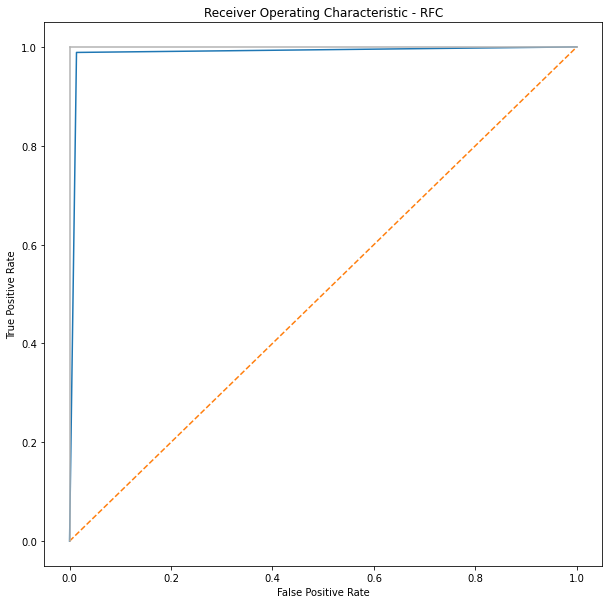

In [61]:
# roc_auc plot for RFC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, pred_rfc)
print('roc_auc_score for RFC: ', roc_auc_score(y_test, pred_rfc))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RFC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
